In [2]:
# Don't forget to do : pip install -e.

!python -m pip install -e ..
#!python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128
!python -m pip install einops timm

Obtaining file:///C:/Users/Alban%20NYANTUDRE/Desktop/GitHub/Frame2Text4LLM
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for frame2text4llm (pyproject.toml): started
  Building editable for frame2text4llm (pyproject.toml): finished with status 'done'
  Created wheel for frame2text4llm: filename=frame2text4llm-0.0.1-0.editable-py3-none-any.whl size=2768 sha256=d1bc9f772292c387bf2d079967a84ecb750bc98abfe226581d4a2634762f29

In [3]:
import os
from dotenv import load_dotenv
from frame2text4llm.framer import VideoReader, SubtitleRegionDetector, display_frames
from frame2text4llm.ocr import OCRManager, OCRBatchProcessor
from frame2text4llm.ocr.utils import group_and_clean_text

load_dotenv()

False

# Load 

In [4]:
video_path = "../sandbox/sample_short.mp4"
reader = VideoReader(video_path, engine="opencv",)
reader.print_info()

2025-06-26 15:30:09.133 | INFO     | frame2text4llm.framer.video:print_info:97 - Video information for sample_short.mp4:
2025-06-26 15:30:09.134 | INFO     | frame2text4llm.framer.video:print_info:98 -   - Dimensions: 720x900
2025-06-26 15:30:09.134 | INFO     | frame2text4llm.framer.video:print_info:99 -   - FPS: 30.00
2025-06-26 15:30:09.134 | INFO     | frame2text4llm.framer.video:print_info:100 -   - Total frames 📸 : 7667
2025-06-26 15:30:09.135 | INFO     | frame2text4llm.framer.video:print_info:101 -   - Duration: 255.57 seconds
2025-06-26 15:30:09.135 | INFO     | frame2text4llm.framer.video:print_info:102 -   - Time per frame: 0.0333 seconds
2025-06-26 15:30:09.136 | INFO     | frame2text4llm.framer.video:print_info:103 -   - Engine: opencv


#  Subtitle detection

In [5]:
"""detector = SubtitleRegionDetector(reader)
subtitle_region = detector.detect_region()
images = [frame.image for frame in frames] 
detector.visualize_region(subtitle_region, images ,frame_index=8)"""

'detector = SubtitleRegionDetector(reader)\nsubtitle_region = detector.detect_region()\nimages = [frame.image for frame in frames] \ndetector.visualize_region(subtitle_region, images ,frame_index=8)'

# OCR

In [6]:
ocr_manager = OCRManager(reader)

2025-06-26 15:30:09.159 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:211 - Extracting frames with OpenCV: sample_short.mp4
2025-06-26 15:30:09.167 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:226 - 💡 Extracting 255 frames from 7667 total frames at 1 FPS
2025-06-26 15:30:09.411 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 10 frames...
2025-06-26 15:30:09.667 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 20 frames...
2025-06-26 15:30:09.922 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 30 frames...
2025-06-26 15:30:10.169 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 40 frames...
2025-06-26 15:30:10.417 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 50 frames...
2025-06-26 15:30:10.662 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 60 frames...
2025-0

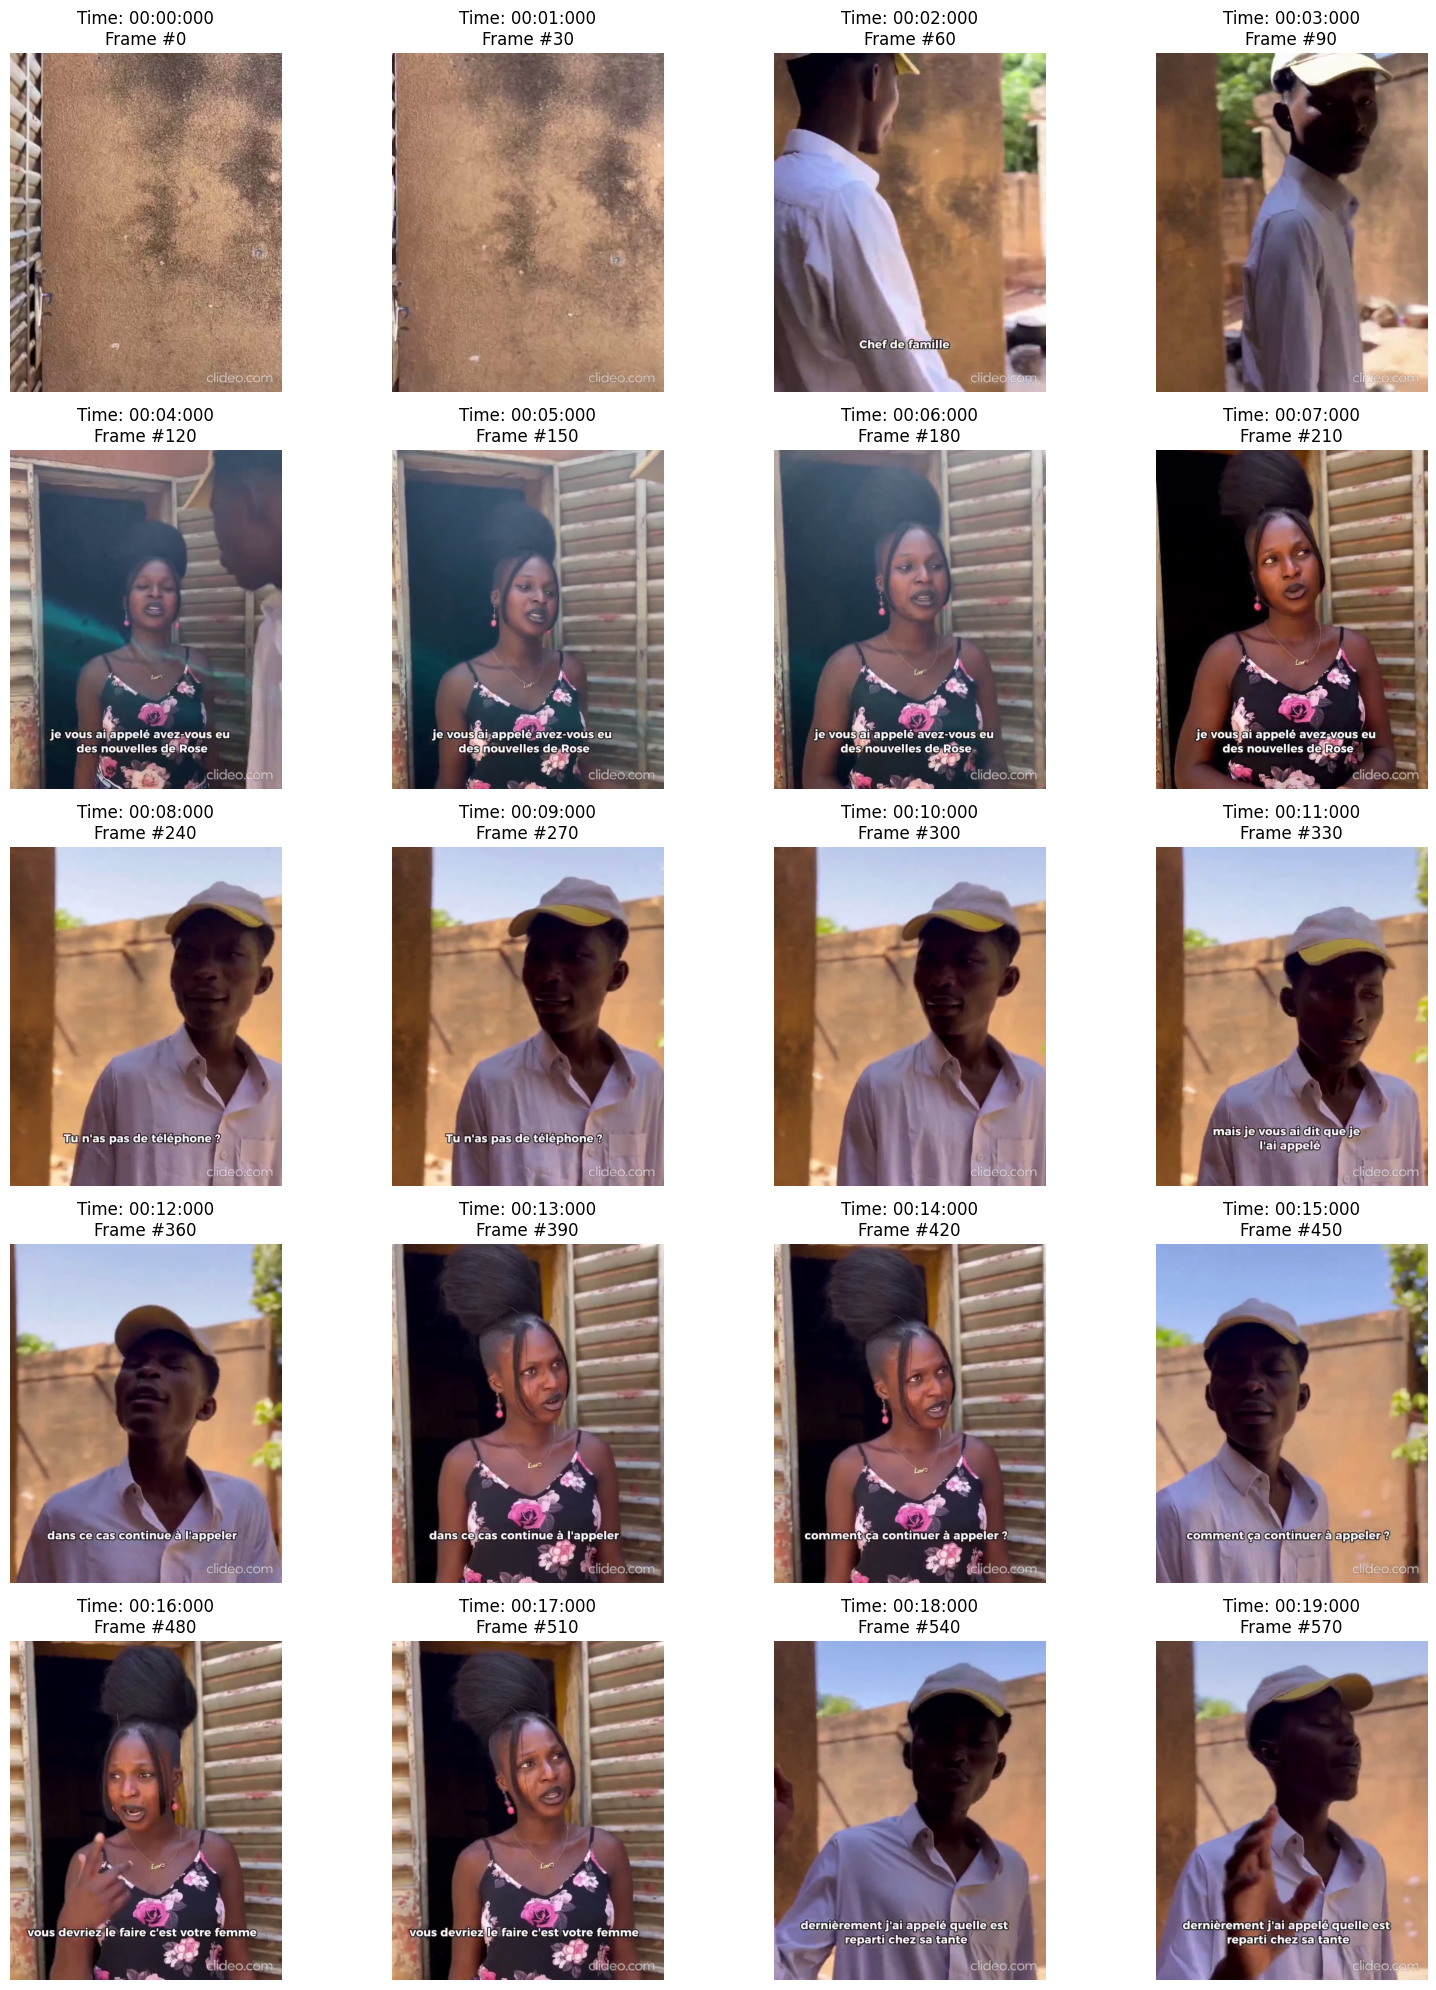

256

In [7]:
frames = reader.extract_frames(target_fps=1, max_frames=-1)
display_frames(frames, max_samples=20)
len(frames)

2025-06-26 15:30:16.700 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:211 - Extracting frames with OpenCV: sample_short.mp4
2025-06-26 15:30:16.713 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:226 - 💡 Extracting 255 frames from 7667 total frames at 1 FPS
2025-06-26 15:30:16.989 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 10 frames...
2025-06-26 15:30:17.244 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 20 frames...
2025-06-26 15:30:17.499 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 30 frames...
2025-06-26 15:30:17.753 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 40 frames...
2025-06-26 15:30:18.014 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 50 frames...
2025-06-26 15:30:18.270 | INFO     | frame2text4llm.framer.video:_extract_frames_opencv:251 - Extracted 60 frames...
2025-0

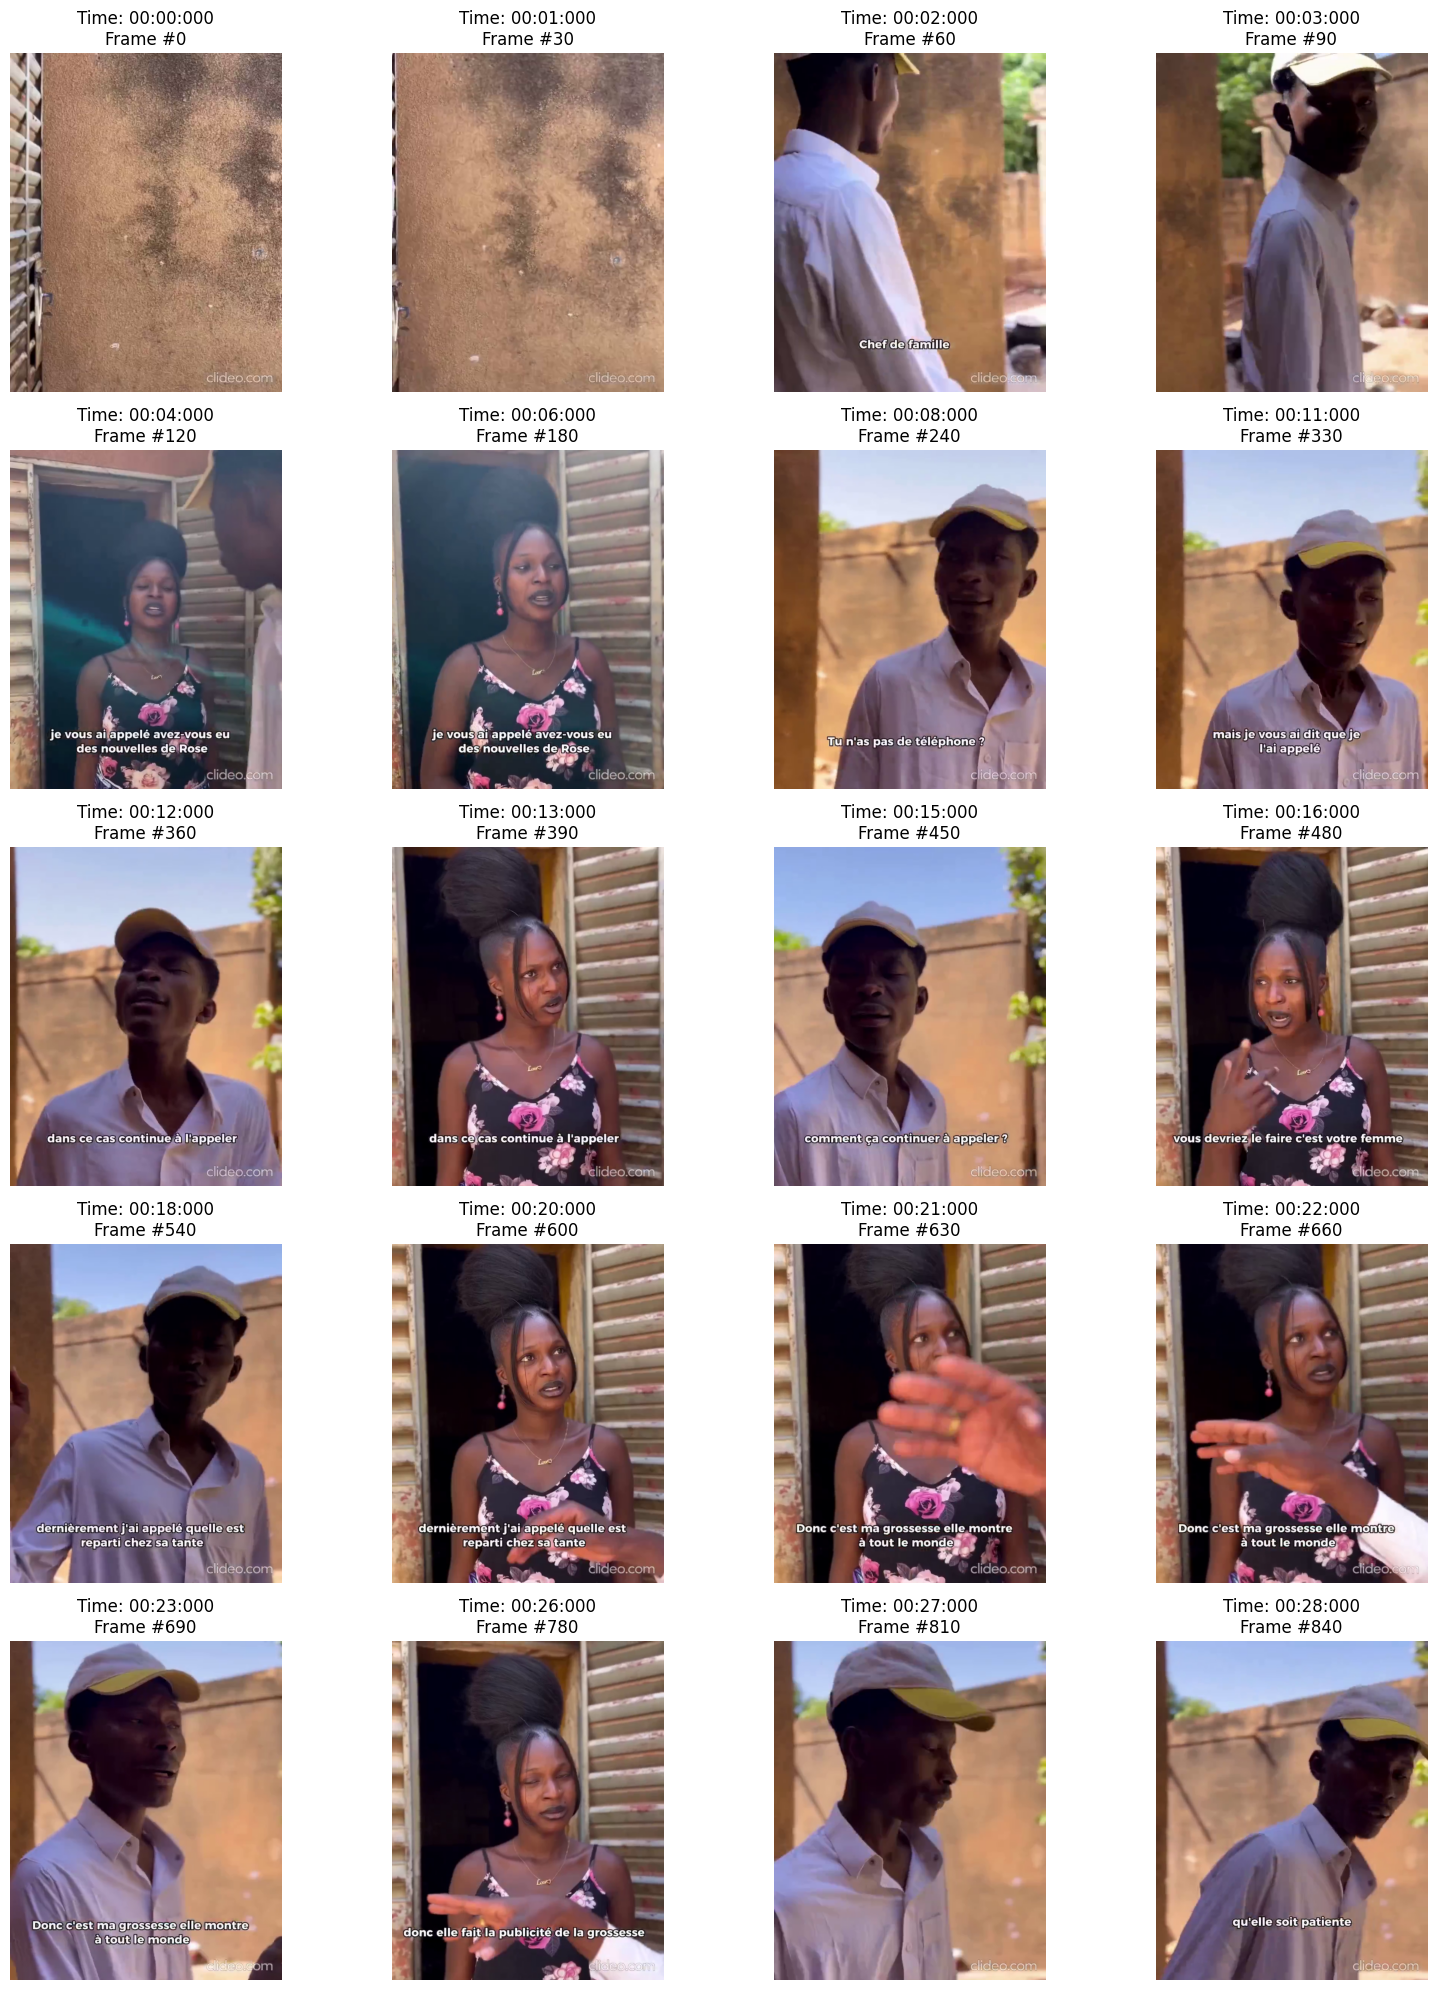

115

In [8]:
frames_filtered = reader.extract_frames(
    target_fps=1, 
    filter_duplicates=True, 
    diff_thresh=20
)
display_frames(frames_filtered, max_samples=20)
len(frames_filtered)

In [9]:
from frame2text4llm.ocr.tools import OCR_TOOLS
print("Available tools:", list(OCR_TOOLS.keys()))

Available tools: ['tesseract', 'paddleocr', 'openai', 'mistral', 'easyocr', 'vlm']


# EasyOCR

In [10]:
extracted_text = ocr_manager.process(
    image=frames[60].image, 
    tool="easyocr", 
    lang="fr"
)
print(extracted_text)

2025-06-26 15:30:24.893 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:30:24.895 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:30:25.047 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-06-26 15:30:26.395 | INFO     | frame2text4llm.ocr.tools.easyocr:_initialize_reader:19 - EasyOCR reader initialized


tu me connais très bien dans ce quartier jétais pas du tout une bonne personne clideo.con


## VLM OCR

In [12]:
extracted_text = ocr_manager.process(
    image=frames[60].image, 
    tool="vlm", 
    model_name="InternVL2-1B" #il ya ttjrs une erreur avec Florence-2-base, i'm not sure why
)

print(extracted_text)

2025-06-26 15:32:50.829 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:32:50.830 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:32:51.005 | INFO     | frame2text4llm.framer.subtitle:detect_region:62 - Detected subtitle region: y=630:900, x=36:684
2025-06-26 15:32:51.007 | INFO     | frame2text4llm.ocr.tools.vlmocr:_initialize_model:35 - Initializing VLM model: OpenGVLab/InternVL2-1B


FlashAttention2 is not installed.


2025-06-26 15:32:54.653 | INFO     | frame2text4llm.ocr.tools.vlmocr:_initialize_model:74 - VLM model initialized
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


tu me connais très bien dans ce quartier
j'étais pas du tout une bonne personne


## Aggregator  EasyOCR

In [13]:
processor = OCRBatchProcessor(ocr_manager)
results = processor.process_batch(
    frames=frames,
    tool="easyocr",
    lang="fr", 
    n_cores=4,
    preserve_order=True
)

for result in results:
    if result["success"]:
        print(f"Frame at {result['time_formatted']}: {result['text']}")
    else:
        print(f"Failed to process frame at {result['time_formatted']}: {result['error']}")

2025-06-26 15:32:55.448 | INFO     | frame2text4llm.ocr.batch:process_batch:132 - Starting batch OCR processing of 256 frames using 4 threads
2025-06-26 15:32:55.450 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:32:55.453 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:32:55.453 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:32:55.456 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:32:55.456 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:32:55.458 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:32:55.467 | INFO     | frame2text4

Frame at 00:00:000: clideo con
Frame at 00:01:000: clideo con
Frame at 00:02:000: Chef de faille clideo con
Frame at 00:03:000: clideocon
Frame at 00:04:000: je vous ai appelé avez-vous eu des nouvelles de Rose clideo con
Frame at 00:05:000: je vous @i appelé avez-vous eu des nouvelles de Rose clideo con
Frame at 00:06:000: je vous &i appelé avez-vous eu des nouvelles de Rose clideocon
Frame at 00:07:000: je vous ai appelé avez-vous eu des nouvelles de Rose clideocon
Frame at 00:08:000: clideo con
Frame at 00:09:000: Tu n'as pas de téléphone ? clideo con
Frame at 00:10:000: clideo con
Frame at 00:11:000: mais je vous ai dit que je clideo con
Frame at 00:12:000: dans ce cas continue à Fappeler clideo con
Frame at 00:13:000: dans cecas continue à l'appeler clideocon
Frame at 00:14:000: comment ça continuer à appeler clideo.con
Frame at 00:15:000: comment ça continuer clideo con
Frame at 00:16:000: vous devriez le faire c'est votre femme clideo.com
Frame at 00:17:000: vous devriez le fair

In [14]:
import pandas as pd
segments = group_and_clean_text(results, signature_keywords="clideo.con")
df_result = pd.DataFrame(segments)
df_result

start_time         end_time  \
0  0 days 00:00:00  0 days 00:00:29   
1  0 days 00:00:30  0 days 00:00:59   
2  0 days 00:01:00  0 days 00:01:29   
3  0 days 00:01:30  0 days 00:01:59   
4  0 days 00:02:00  0 days 00:02:29   
5  0 days 00:02:30  0 days 00:02:59   
6  0 days 00:03:00  0 days 00:03:29   
7  0 days 00:03:30  0 days 00:03:59   
8  0 days 00:04:00  0 days 00:04:15   

                                     aggregated_text  
0  clideo con clideo con Chef de faille clideo co...  
1  où partez-vous ? clideocon où partez-vous ? cl...  
2  tu me connais très bien dans ce quartier jétai...  
3  mais cest pas aussi facile clideo con c'est vr...  
4  comment tu vas clideo con comment tu vas? clid...  
5  plus la toucher plus la toucher Elle aussi est...  
6  clideocon tu vois de la manière dont tu veux u...  
7  j'étais sûr qufavec toi je n'apprendrai rien c...  
8  garde tes conseills de cêlibataire poutoi ciao...

In [15]:
df_result.shape

(9, 3)

In [16]:
results_filtered = processor.process_batch(
    frames=frames_filtered, 
    tool="easyocr", 
    lang="fr",
    n_cores=4,
    merge_segments=True,
    sim_thresh=0.8
)

for result in results_filtered:
    print(f"Segment {result['start_time']} - {result['end_time']}: {result['text']}")

2025-06-26 15:33:26.011 | INFO     | frame2text4llm.ocr.batch:process_batch:132 - Starting batch OCR processing of 256 frames using 4 threads
2025-06-26 15:33:26.013 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:33:26.016 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:33:26.017 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:33:26.021 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:33:26.020 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:33:26.023 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:33:26.027 | INFO     | frame2text4

Segment 00:00:000 - 00:01:000: clideo con
Segment 00:02:000 - 00:02:000: Chef de faille clideo con
Segment 00:03:000 - 00:03:000: clideocon
Segment 00:04:000 - 00:07:000: je vous ai appelé avez-vous eu des nouvelles de Rose clideo con
Segment 00:08:000 - 00:08:000: clideo con
Segment 00:09:000 - 00:09:000: Tu n'as pas de téléphone ? clideo con
Segment 00:10:000 - 00:10:000: clideo con
Segment 00:11:000 - 00:11:000: mais je vous ai dit que je clideo con
Segment 00:12:000 - 00:13:000: dans ce cas continue à Fappeler clideo con
Segment 00:14:000 - 00:15:000: comment ça continuer à appeler clideo.con
Segment 00:16:000 - 00:17:000: vous devriez le faire c'est votre femme clideo.com
Segment 00:18:000 - 00:20:000: dernièrement j'ai appelë quelle est reparti chez sa tante clideo con
Segment 00:21:000 - 00:21:000: Donc c'est ma grossesse elle montre à tout le monde clideo con
Segment 00:22:000 - 00:22:000: à tout le monde
Segment 00:23:000 - 00:24:000: Donc c'est ma grossesse elle montre à tout

In [17]:
# il ya un prob avec la fonction group_and_clean_text

# segments = group_and_clean_text(results_filtered, signature_keywords="clideo.con")
# df_result = pd.DataFrame(segments)
# df_result

## Aggregator  InternVL2-1B

In [20]:
results = processor.process_batch(
    frames=frames_filtered,
    tool="vlm",
    model_name="InternVL2-1B",
    n_cores=4,
    merge_segments=True,
    sim_thresh=0.8
)

for result in results_filtered:
    print(f"Segment {result['start_time']} - {result['end_time']}: {result['text']}")

2025-06-26 15:46:06.812 | INFO     | frame2text4llm.ocr.batch:process_batch:132 - Starting batch OCR processing of 115 frames using 4 threads
2025-06-26 15:46:06.845 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:46:06.847 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:46:06.849 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
2025-06-26 15:46:06.851 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_short.mp4
2025-06-26 15:46:06.851 | INFO     | frame2text4llm.framer.subtitle:detect_region:41 - Analyzing frames at positions: [1916, 3833, 5750]
🔠 OCR Processing:   0%|          | 0/115 [00:00<?, ?it/s]2025-06-26 15:46:06.852 | INFO     | frame2text4llm.framer.subtitle:detect_region:31 - Detecting subtitle region for sample_s

Segment 00:00:000 - 00:01:000: clideo con
Segment 00:02:000 - 00:02:000: Chef de faille clideo con
Segment 00:03:000 - 00:03:000: clideocon
Segment 00:04:000 - 00:07:000: je vous ai appelé avez-vous eu des nouvelles de Rose clideo con
Segment 00:08:000 - 00:08:000: clideo con
Segment 00:09:000 - 00:09:000: Tu n'as pas de téléphone ? clideo con
Segment 00:10:000 - 00:10:000: clideo con
Segment 00:11:000 - 00:11:000: mais je vous ai dit que je clideo con
Segment 00:12:000 - 00:13:000: dans ce cas continue à Fappeler clideo con
Segment 00:14:000 - 00:15:000: comment ça continuer à appeler clideo.con
Segment 00:16:000 - 00:17:000: vous devriez le faire c'est votre femme clideo.com
Segment 00:18:000 - 00:20:000: dernièrement j'ai appelë quelle est reparti chez sa tante clideo con
Segment 00:21:000 - 00:21:000: Donc c'est ma grossesse elle montre à tout le monde clideo con
Segment 00:22:000 - 00:22:000: à tout le monde
Segment 00:23:000 - 00:24:000: Donc c'est ma grossesse elle montre à tout